## Climate Model and Climate data workshop, hands-on session

This jupyter notebook is part of the climate model and climate data workshop. It showcases how to use climate model data in python. However, it is not a python course!

Use environment "iacpy3_2023".

We will use the xarray package: https://docs.xarray.dev/en/stable/index.html

The example data can be downloaded here:

First, packages which we will use later need to be loaded.

In [1]:
import numpy as np
import xarray as xr

In [2]:
# read cmip6 data from netcdf
inpath='/net/co2/c2sm-data/rlorenz/climate_model_data_workshop'
ifile = f'{inpath}/tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_201001-201412.nc'
variable_name='tas'
with xr.open_dataset(ifile) as ds:
    da = ds[variable_name]
print(da)

<xarray.DataArray 'tas' (time: 60, lat: 96, lon: 192)>
[1105920 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2010-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-09-04T13:47:47Z altered by CMOR: Treated scalar dime...


In [3]:
# read data for one year only
with xr.open_dataset(ifile).sel(time='2012') as ds:
    da_tim = ds[variable_name]
print(da_tim)

<xarray.DataArray 'tas' (time: 12, lat: 96, lon: 192)>
[221184 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2012-01-16T12:00:00 ... 2012-12-16T12:00:00
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-09-04T13:47:47Z altered by CMOR: Treated scalar dime...


In [4]:
# read data but only for polygon
min_lon =  5. 
max_lon = 16. 
# latitude is -90 to 90
min_lat = 45.
max_lat = 55.
with xr.open_dataset(ifile).sel(lat=slice(min_lat,max_lat), lon=slice(min_lon,max_lon)) as ds:
    da_reg = ds[variable_name]
print(da_reg)

<xarray.DataArray 'tas' (time: 60, lat: 5, lon: 6)>
[1800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2010-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 45.7 47.56 49.43 51.29 53.16
  * lon      (lon) float64 5.625 7.5 9.375 11.25 13.12 15.0
    height   float64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-09-04T13:47:47Z altered by CMOR: Treated scalar dime...


In [5]:
# extract certain region using regionmask package, 
import regionmask
print(regionmask.defined_regions.srex)

<regionmask.Regions 'SREX'>
Source:   Seneviratne et al., 2012 (https://www.ipcc.ch/site/assets/uploads/2...
overlap:  False

Regions:
 1 ALA       Alaska/N.W. Canada
 2 CGI     Canada/Greenl./Icel.
 3 WNA         W. North America
 4 CNA         C. North America
 5 ENA         E. North America
..  ..                      ...
22 EAS                  E. Asia
23 SAS                  S. Asia
24 SEA                S.E. Asia
25 NAU             N. Australia
26 SAU S. Australia/New Zealand

[26 regions]


In [6]:
lon=da['lon']
lat=da['lat']

In [7]:
mask = regionmask.defined_regions.srex.mask(lon, lat)
CEU_index = regionmask.defined_regions.srex.map_keys("C. Europe")
print(f'CEU_index: {CEU_index}')
mask_CEU = mask == CEU_index
da_CEU = da.isel(time=1).where(mask_CEU)
print(da_CEU)

CEU_index: 12
<xarray.DataArray 'tas' (lat: 96, lon: 192)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2010-02-15
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 2.0
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-09-04T13:47:47Z altered by CMOR: Treated scalar dime...


In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

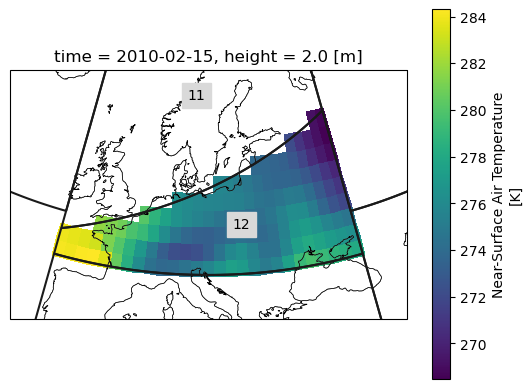

In [9]:
# choose a good projection for regional maps
proj=ccrs.LambertConformal(central_longitude=15)

# plot the outline of the central European region
ax = regionmask.defined_regions.srex.plot(add_ocean=False, resolution='50m',
                          projection=proj, add_label=True)

da_CEU.plot.pcolormesh('lon', 'lat', ax=ax, transform=ccrs.PlateCarree())

ax.coastlines(linewidth=0.5)

# fine tune the extent
ax.set_extent([-15, 45, 40, 65], crs=ccrs.PlateCarree())

In [11]:
CH = regionmask.defined_regions.natural_earth_v5_0_0.countries_110[["Switzerland"]]
mask = CH.mask(da.lon, da.lat)
da_CH = da.isel(time=1).where(mask==127)

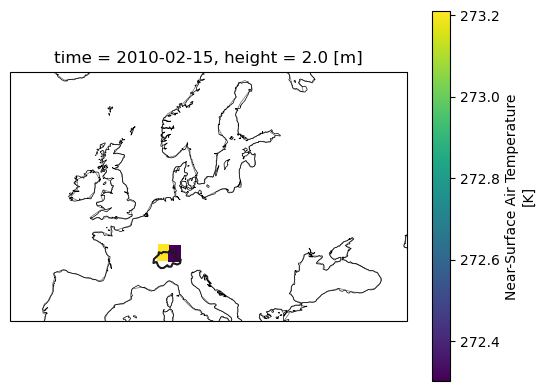

In [12]:
# choose a good projection for regional maps
proj=ccrs.LambertConformal(central_longitude=15)
ax = plt.subplot(111, projection=proj)

da_CH.plot.pcolormesh(ax=ax, x="lon", y="lat", transform=ccrs.PlateCarree())
regionmask.defined_regions.natural_earth_v5_0_0.countries_110[["Switzerland"]].plot(ax=ax, add_label=False)

ax.coastlines(linewidth=0.5)

# fine tune the extent
ax.set_extent([-15, 45, 40, 65], crs=ccrs.PlateCarree())

In [13]:
# read data and calculate seasonal means
with xr.open_dataset(ifile) as ds:
    ds_seas = ds.groupby("time.season").mean(dim='time')
print(ds_seas)

<xarray.Dataset>
Dimensions:   (season: 4, lat: 96, lon: 192, bnds: 2)
Coordinates:
  * lat       (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
  * lon       (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height    float64 2.0
  * season    (season) object 'DJF' 'JJA' 'MAM' 'SON'
Dimensions without coordinates: bnds
Data variables:
    tas       (season, lat, lon) float32 240.4 240.3 240.4 ... 260.5 260.5 260.5
    lat_bnds  (season, lat, bnds) float64 -89.5 -87.65 -87.65 ... 87.65 89.5
    lon_bnds  (season, lon, bnds) float64 -0.9375 0.9375 0.9375 ... 357.2 359.1
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                cmip6-mpi-esm@dkrz.de
    ...                     ...
    title:                  MPI-ESM1-2-LR output prepared for CMIP6
    variable_id:            tas
    var

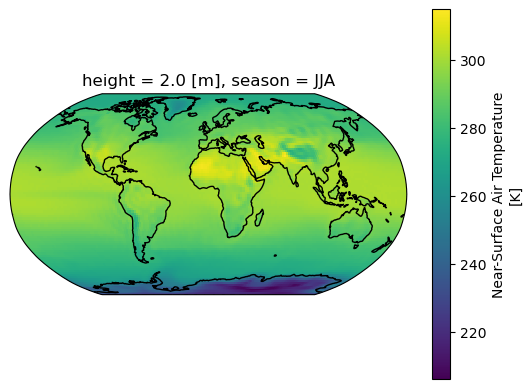

In [14]:
# choose a good projection for global maps
proj = ccrs.Robinson()

ax = plt.subplot(111, projection=proj)

ds_seas.sel(season='JJA').tas.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree())

ax.coastlines();

There are many other things xarray can do, have a look for instance here: https://docs.xarray.dev/en/latest/howdoi.html